In [1]:
import os, sys, json, numpy as np, pandas as pd, pickle, itertools, logging
from sklearn.preprocessing import MinMaxScaler
from typing import TypeVar, Union, List, Literal, Tuple

In [2]:
from data.make_numpy import preprocessing_pipeline, UNZIPPED_FILE
from fundamental_domain_projections.example1 import fundamental_domain_projection

In [8]:
X, y = preprocessing_pipeline(UNZIPPED_FILE, extraction_key='h_1,1')

In [3]:
from fundamental_domain_projections.dirichlet.dirichlet_dataset import DirichletDataset

In [5]:
dataset = DirichletDataset(X=X, Y=y, matrix_dim=list(X.shape)[1:])

Fixed point (x0) used:  [[ 1.1712386   5.39716452 -3.36204844 -7.62748005 -6.99759324  3.54881636
   4.12697184  1.07979268  5.2350386  -7.34003505  5.21495319 -6.79695338
   2.38286511  0.2248728   1.1146488  -7.41698295  2.23264106  0.55651819
  -1.47618912 -3.64904178 -4.29466839 -7.17929626 -3.865437    3.60472616
  -1.71685172  0.50640782]
 [ 3.03846043  2.3324441  -6.99972747  0.66465547 -3.62255934 -6.25241803
  -4.85942422 -1.61195055  5.86649164 -2.04314667  5.48655367 -4.89406694
   1.34003729  5.83557079  4.46544163 -1.90714389  1.85469414  4.33725819
  -6.39385325  1.1126646  -3.45607955  3.72079858 -5.13418463  5.14670112
   5.10338107 -1.50944532]
 [-0.97082044  0.59486095  3.20584548  4.20280297  2.84412588  0.06156638
   1.49923069 -5.75153302 -7.67285597 -1.99708391 -0.70455787  0.98688912
   3.23833271 -6.26660352 -0.03780311  3.81545579  4.69422698 -6.78930391
  -3.48215593  2.94966999 -7.30402613  0.90466474  4.64789243 -2.65469785
  -3.93450214 -0.77937214]
 [ 0.13

  0%|                                                                                         | 0/78468 [00:00<?, ?it/s]/home/solstice/projects/kreuzer-skarke-ML/fundamental_domain_projections/matrix_permutation_auxiliaryfunctions.py:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x0=='Daniel':
100%|████████████████████████████████████████████████████████████████████████████| 78468/78468 [03:23<00:00, 384.79it/s]


...finished Dirichlet projection calculation.


In [6]:
# from data.make_numpy import DATA_DIR
# with open(os.path.join(DATA_DIR, 'dircichlet_X.pickle'), 'wb') as f:
#     pickle.dump(dataset.X, f)

In [4]:
from data.make_numpy import DATA_DIR
with open(os.path.join(DATA_DIR, 'dircichlet_X.pickle'), 'rb') as f:
    X = pickle.load(f)

# Dimensional Reduction

In [5]:
import phate
phate_op = phate.PHATE(n_components=10, n_jobs=-1)
Y_phate = phate_op.fit_transform(X.reshape(-1, np.multiply(*list(X.shape)[1:])))

Calculating PHATE...
  Running PHATE on 78468 observations and 104 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 120.58 seconds.
    Calculating affinities...
    Calculated affinities in 13.81 seconds.
  Calculated graph and diffusion operator in 135.05 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 6.90 seconds.
    Calculating KMeans...


/home/solstice/anaconda3/envs/ml/lib/python3.9/site-packages/threadpoolctl.py:762: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


    Calculated KMeans in 4.22 seconds.
  Calculated landmark operator in 12.66 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.76 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.62 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 92.35 seconds.
Calculated PHATE in 241.45 seconds.


In [6]:
import seaborn as sns, matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [9]:
df = pd.DataFrame(Y_phate, columns=[f'd{i}' for i in range(1, 11)]).join(pd.DataFrame(y, columns=['Hodge']))

In [10]:
components = phate_op.graph.data_pca.components_
loadings = phate_op.graph.data_nu

In [11]:
import pickle
from data.make_numpy import DATA_DIR
df.to_pickle(os.path.join(DATA_DIR, 'df_phate_dirichlet.pickle'))

with open(os.path.join(DATA_DIR, 'pca_loadings_dirichlet.pickle'), 'wb') as f:
    pickle.dump(loadings, f)

with open(os.path.join(DATA_DIR, 'pca_components_dirichlet.pickle'), 'wb') as f:
    pickle.dump(components, f)

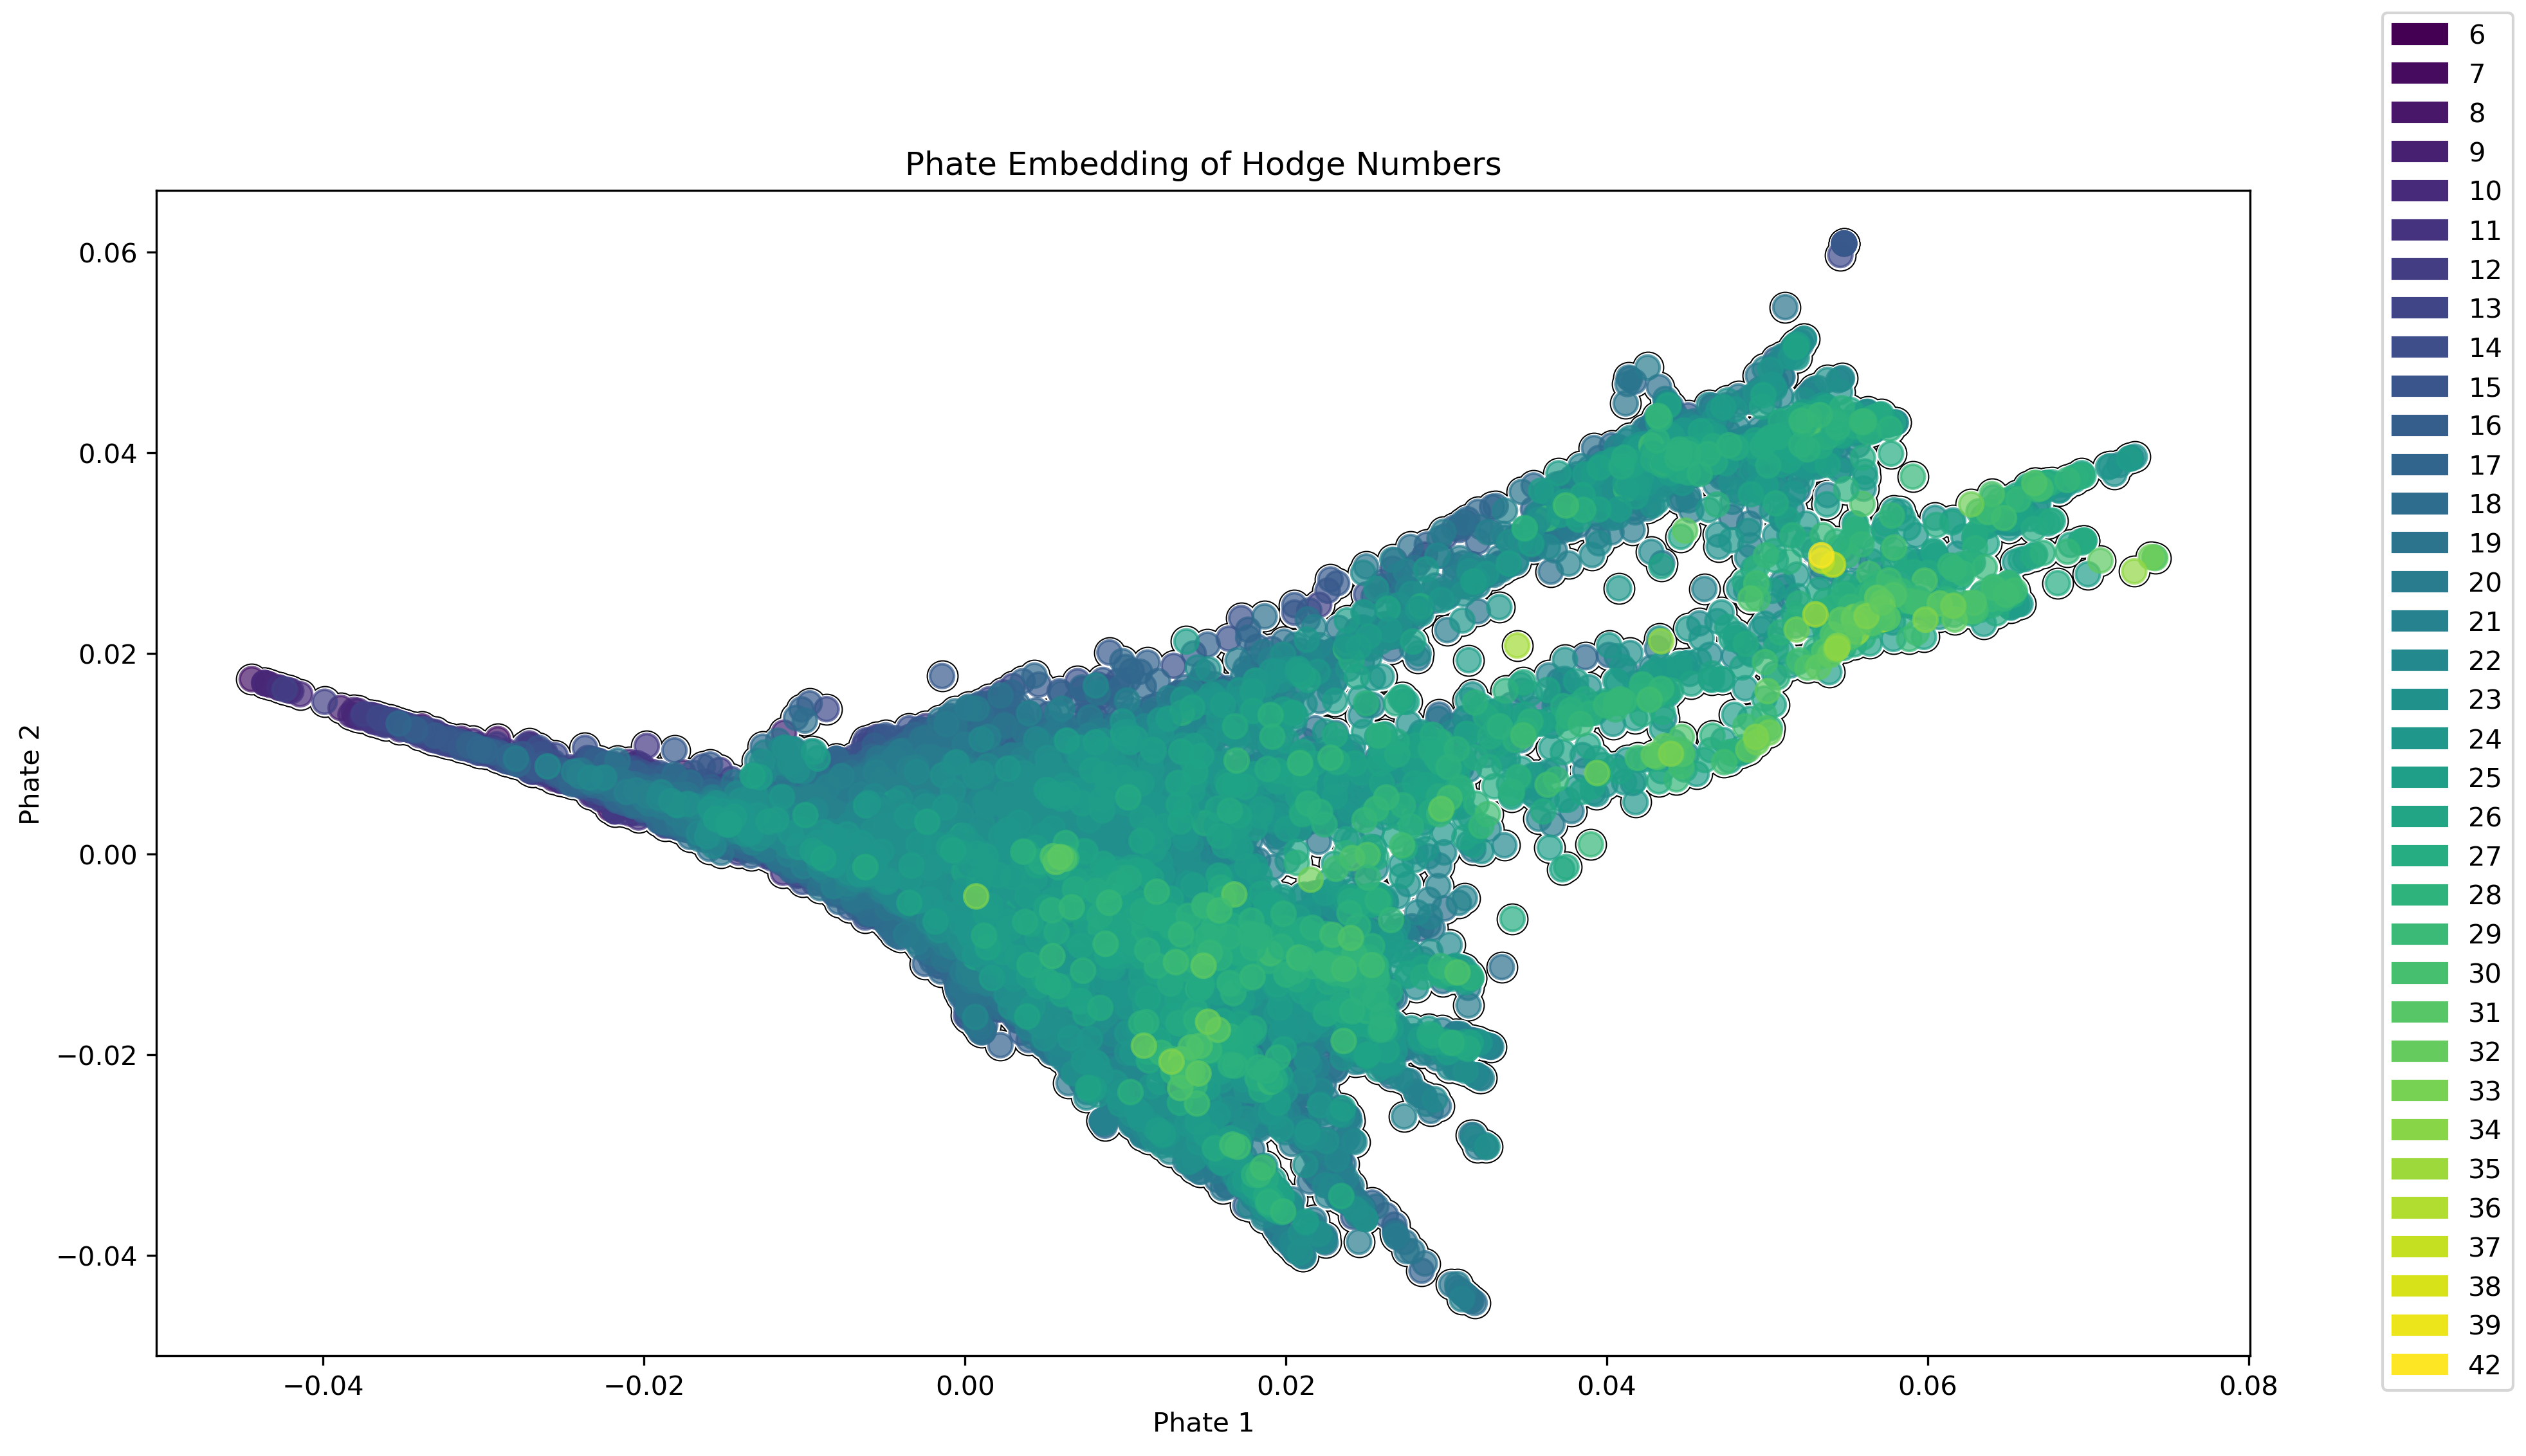

In [12]:
fig = plt.figure(figsize=(14, 8), dpi=300)
ax = fig.add_subplot(1,1,1)
ax.set_title('Phate Embedding of Hodge Numbers')
ax.set_xlabel('Phate 1')
ax.set_ylabel('Phate 2')
ax.scatter(
    df.d1, df.d2, 
    s=120, c='black', cmap='viridis'
)
ax.scatter(
    df.d1, df.d2, 
    s=100, c='white', cmap='viridis'
)
ax.scatter(
    df.d1, df.d2, 
    s=80, c=df.Hodge, cmap='viridis', alpha=0.7,
    marker='o', edgecolors=None
)
cmap = plt.get_cmap()
fig.legend(
    handles=[
        mpatches.Patch(color=cmap(i/(len(np.unique(df.Hodge))-1)), label=hodge)
        for i, hodge in enumerate(np.unique(df.Hodge))
    ]
)

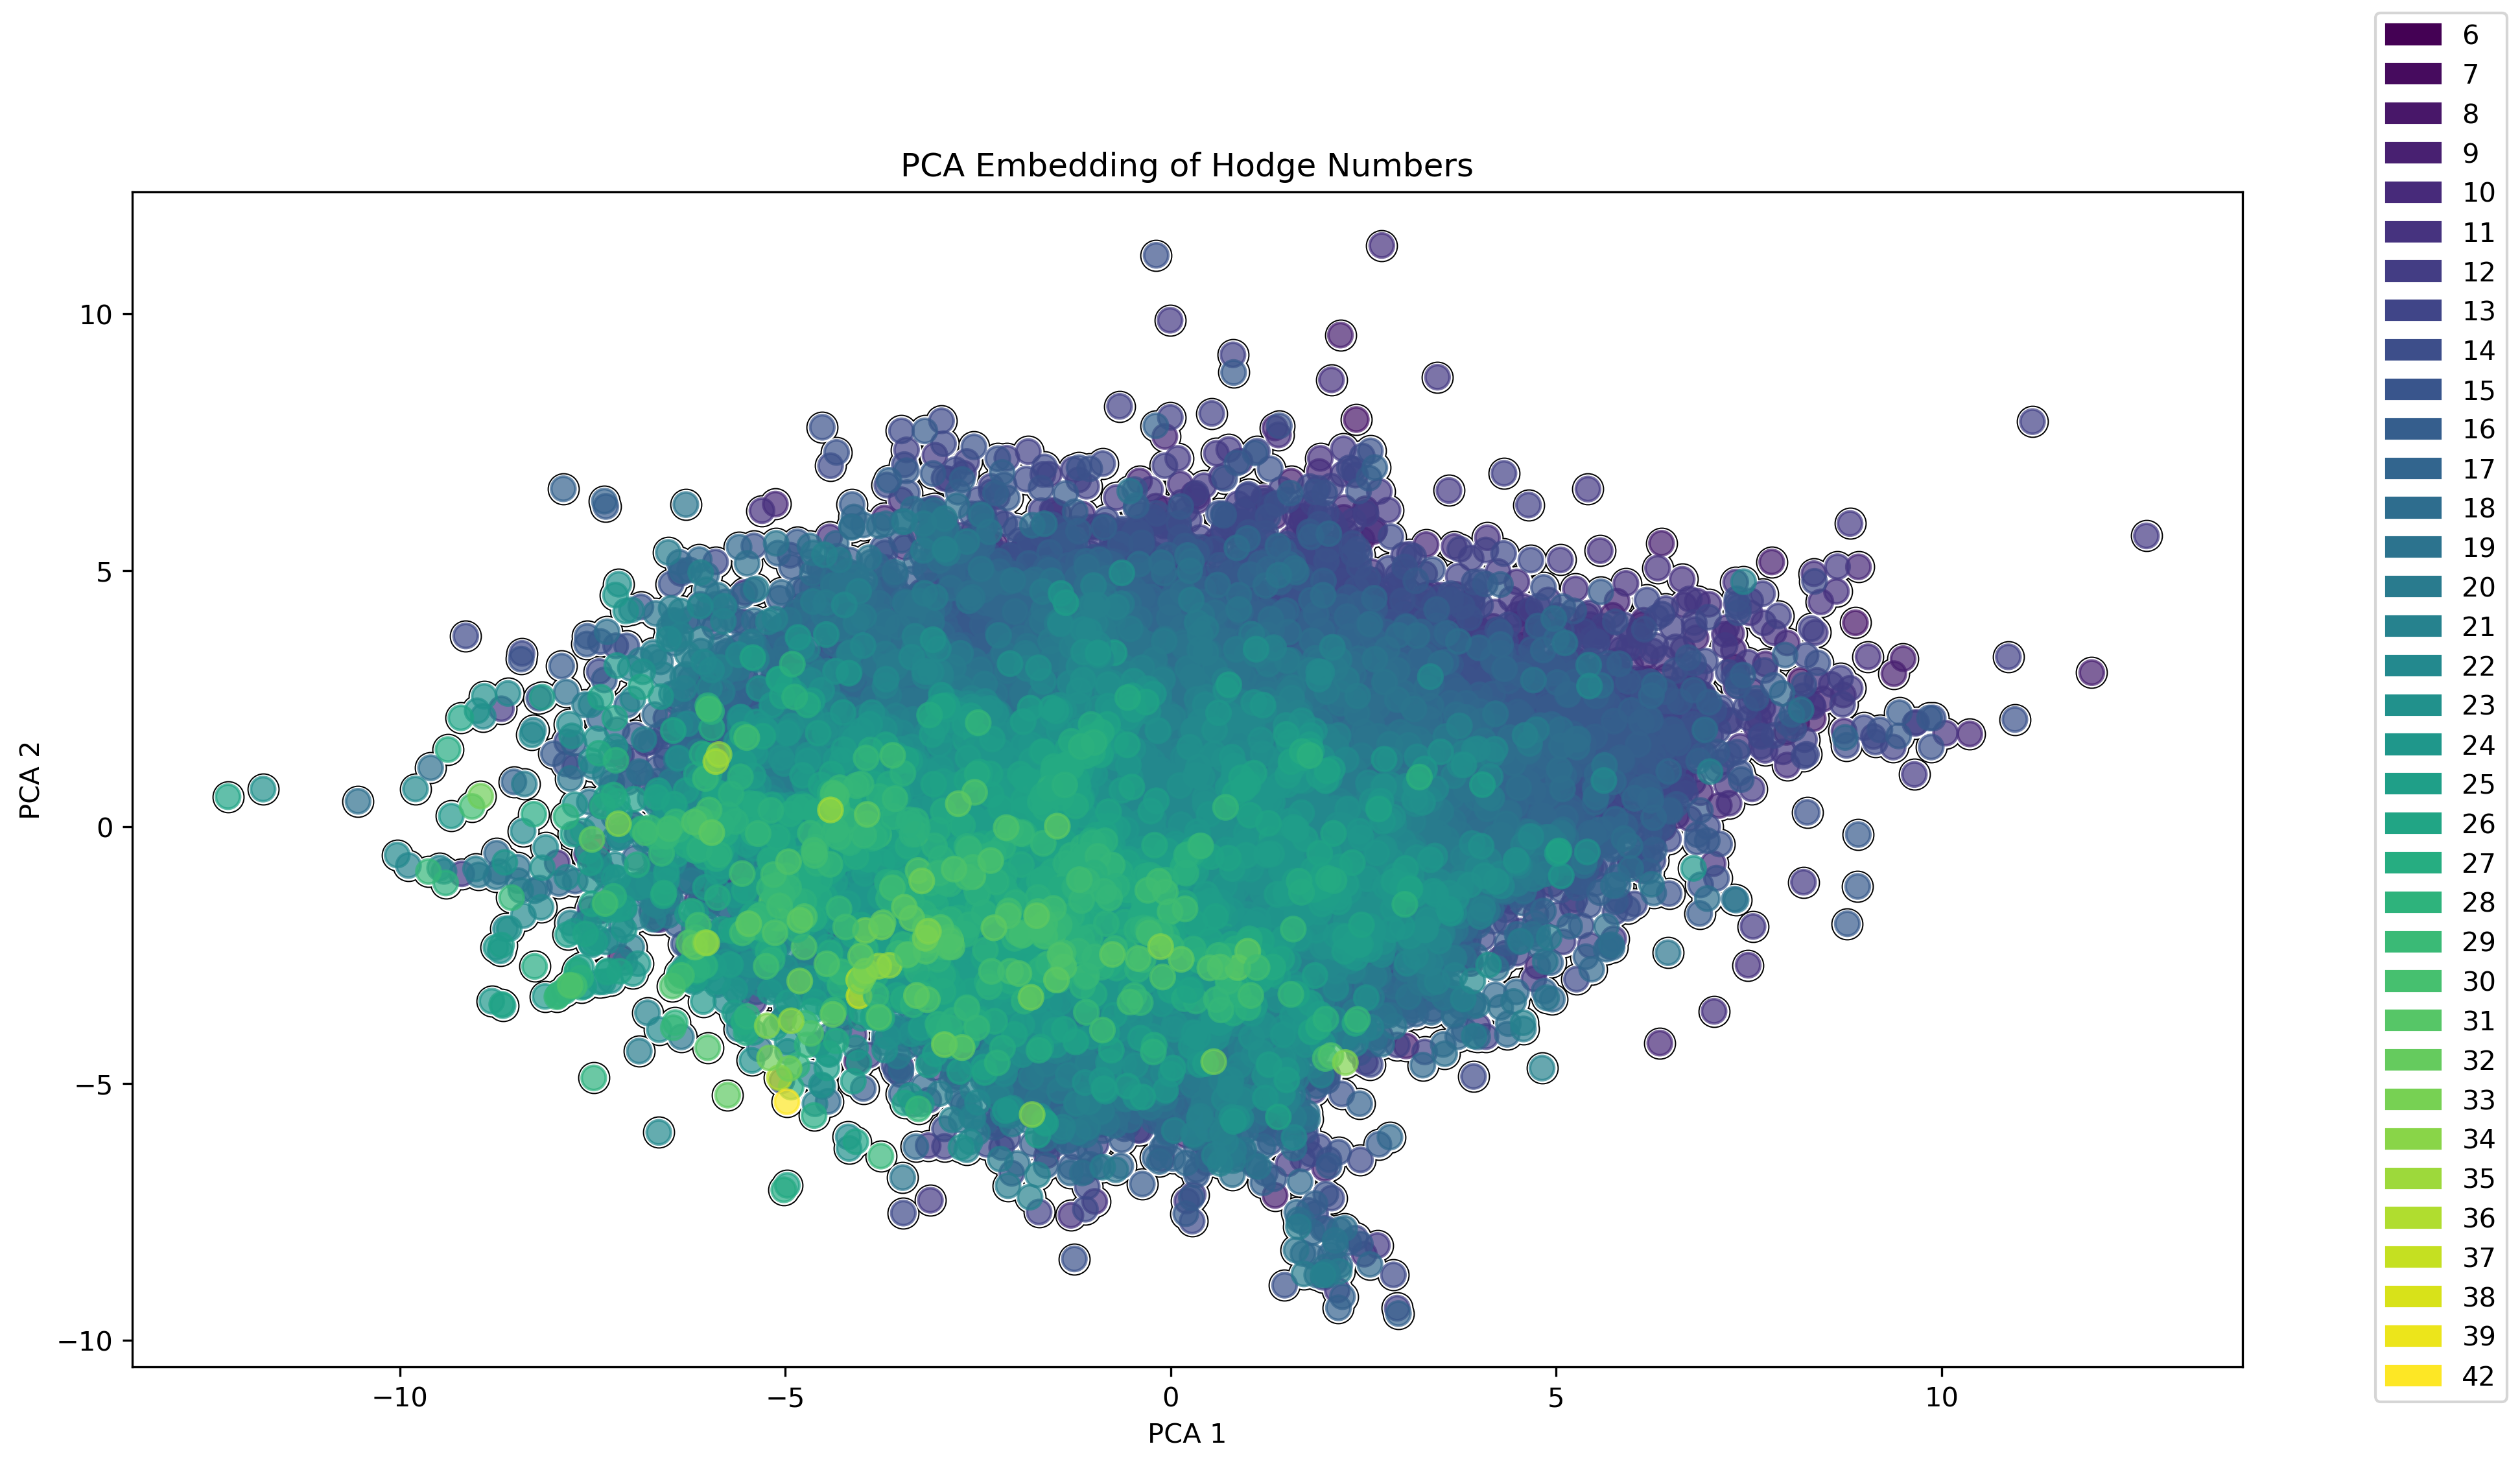

In [13]:
fig = plt.figure(figsize=(14, 8), dpi=300)
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA Embedding of Hodge Numbers')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.scatter(
    loadings[:, 0], loadings[:, 1],
    s=120, c='black', cmap='viridis'
)
ax.scatter(
    loadings[:, 0], loadings[:, 1],
    s=100, c='white', cmap='viridis'
)
ax.scatter(
    loadings[:, 0], loadings[:, 1],
    s=80, c=df.Hodge, cmap='viridis', alpha=0.7,
    marker='o', edgecolors=None
)
cmap = plt.get_cmap()
fig.legend(
    handles=[
        mpatches.Patch(color=cmap(i/(len(np.unique(df.Hodge))-1)), label=hodge)
        for i, hodge in enumerate(np.unique(df.Hodge))
    ]
)

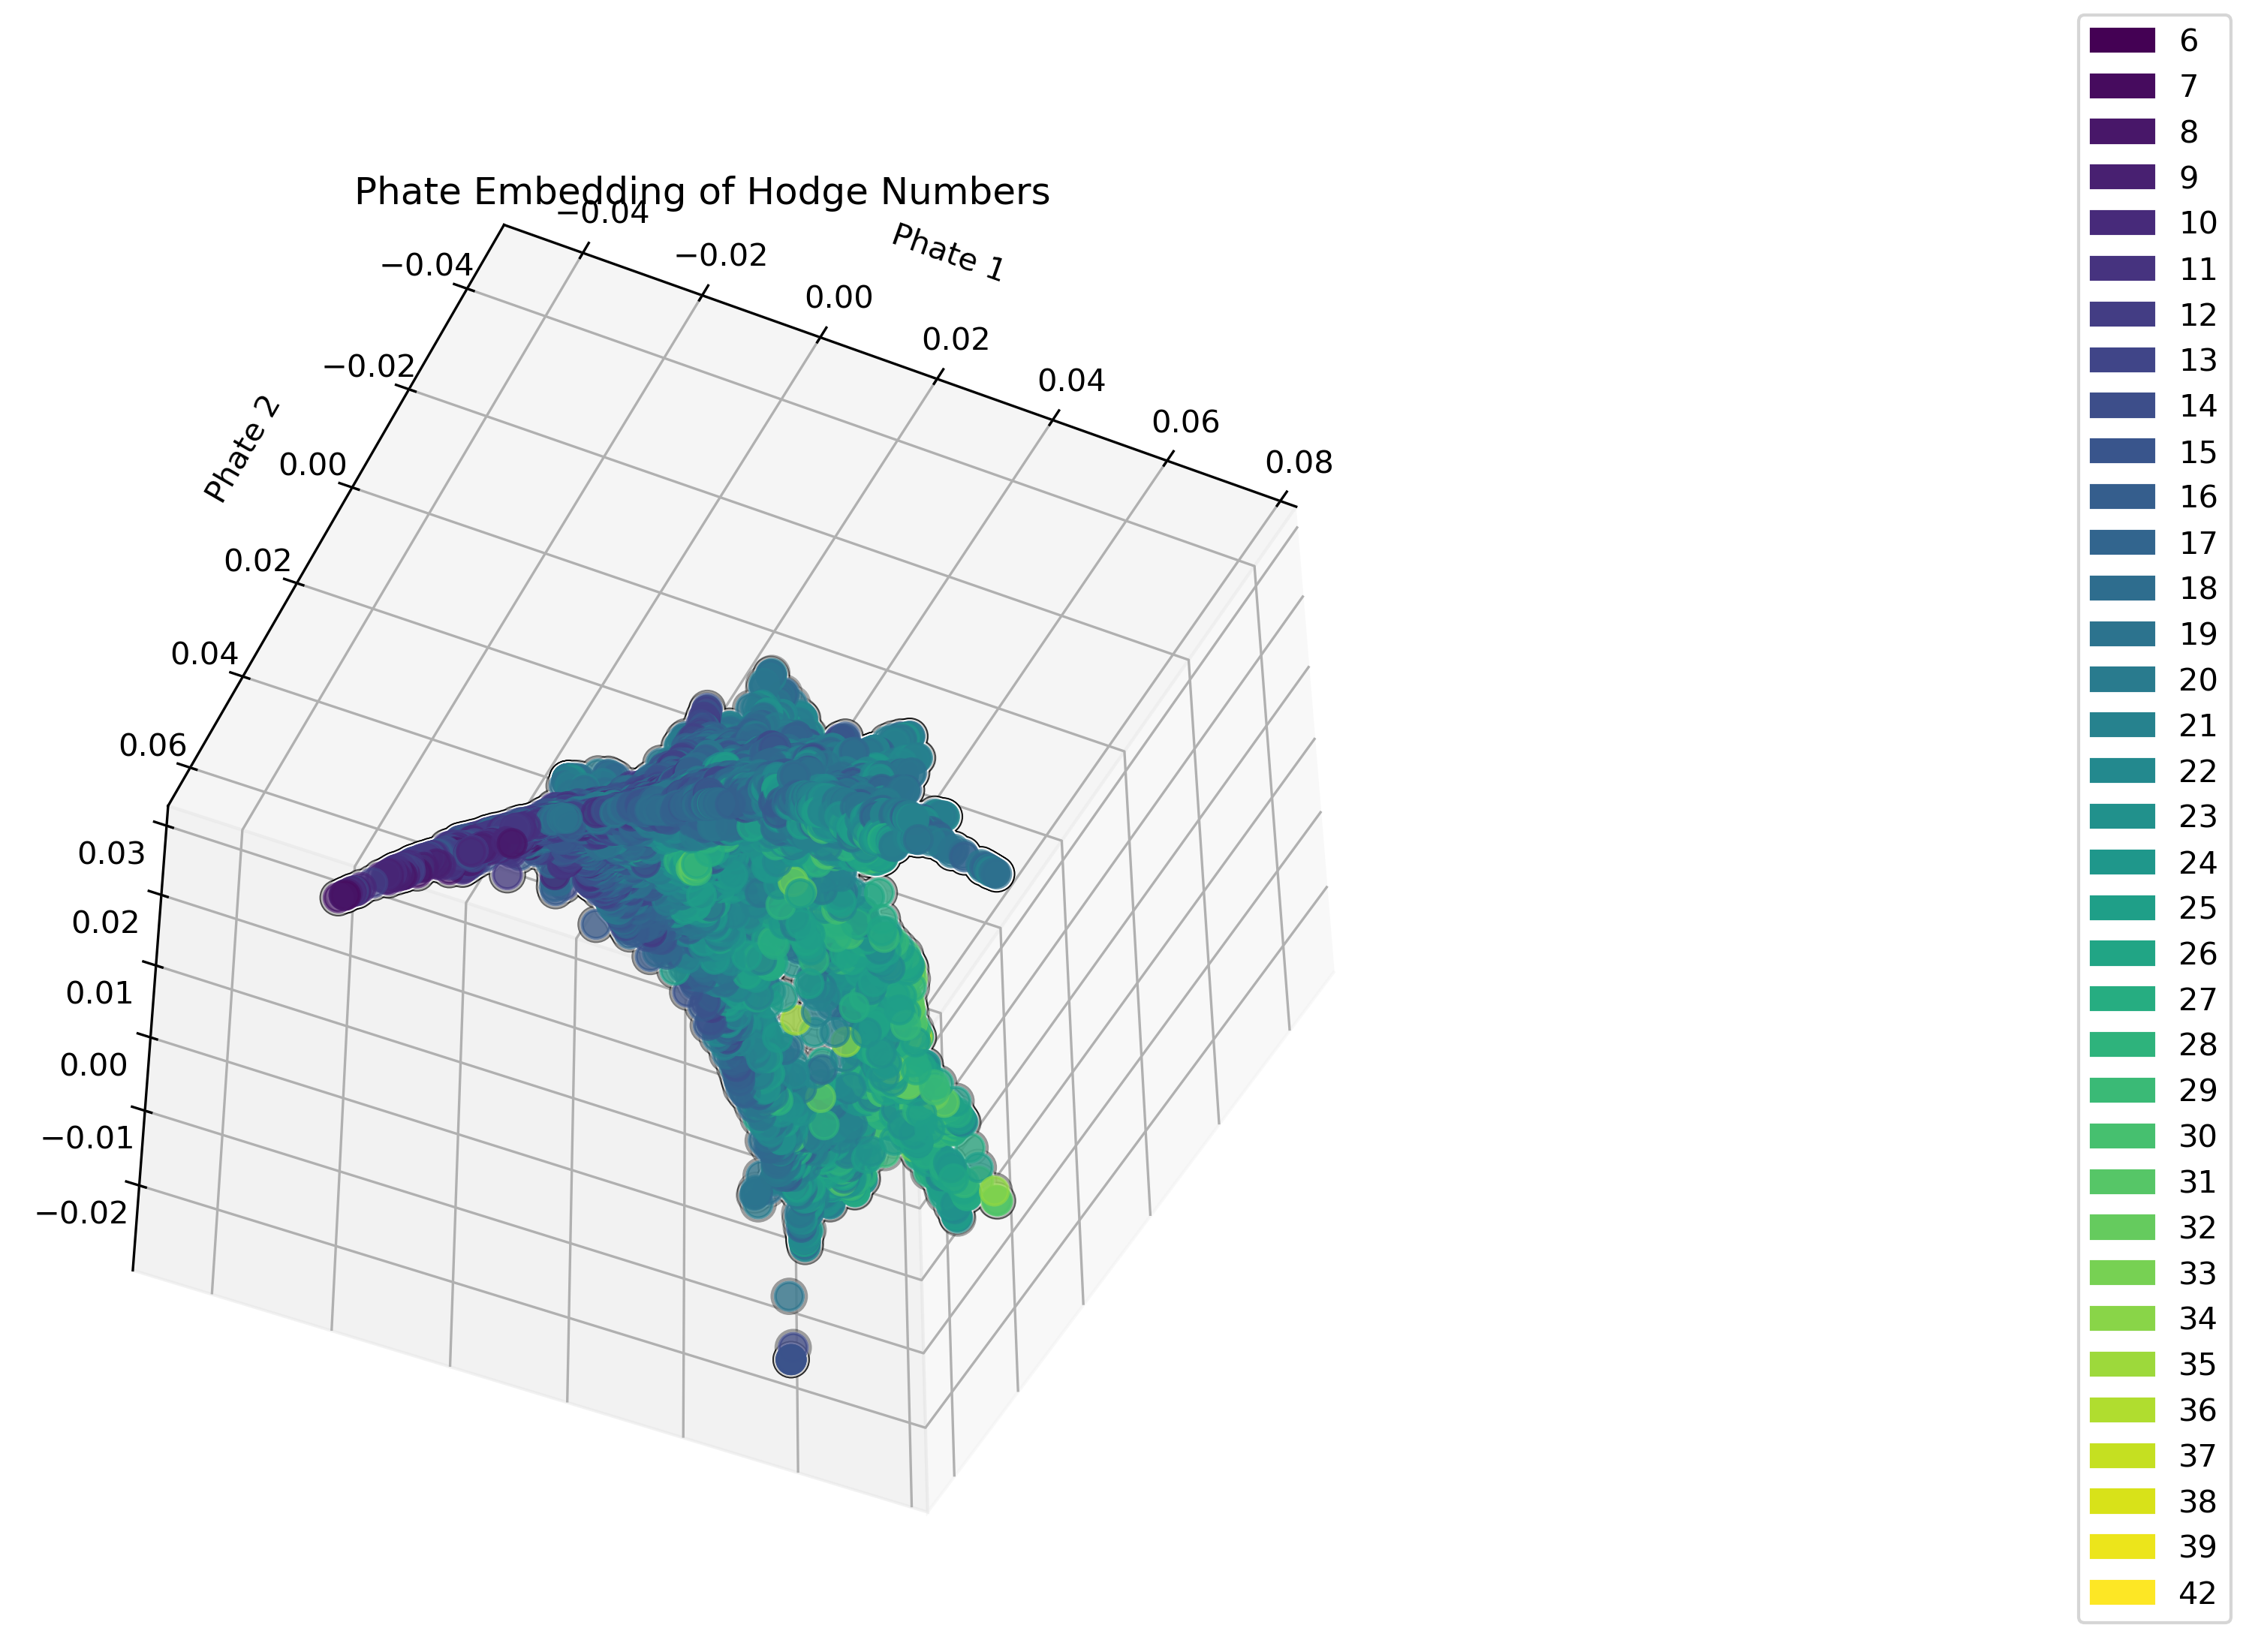

In [15]:
fig = plt.figure(figsize=(14, 8), dpi=300)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_title('Phate Embedding of Hodge Numbers')
ax.set_xlabel('Phate 1')
ax.set_ylabel('Phate 2')
ax.scatter(
    df.d1, df.d2, df.d3,
    s=120, c='black', cmap='viridis'
)
ax.scatter(
    df.d1, df.d2, df.d3,
    s=100, c='white', cmap='viridis'
)
ax.scatter(
    df.d1, df.d2, df.d3,
    s=80, c=df.Hodge, cmap='viridis', alpha=0.7,
    marker='o', edgecolors=None, 
)
cmap = plt.get_cmap()
fig.legend(
    handles=[
        mpatches.Patch(color=cmap(i/(len(np.unique(df.Hodge))-1)), label=hodge)
        for i, hodge in enumerate(np.unique(df.Hodge))
    ]
)
ax.elev = 45
ax.azim = 45

ax.elev = 245
ax.azim = -45

ax.elev = -45
ax.azim = 245